In [25]:
%matplotlib inline

import pickle
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from PIL import Image
from tqdm import tqdm

In [3]:
traj_root = Path("/mnt/vol0/datasets/vint_datasets/egowalk/2024_07_02__15_27_22__1")

with open(traj_root / "traj_data.pkl", "rb") as f:
    traj_data = pickle.load(f)

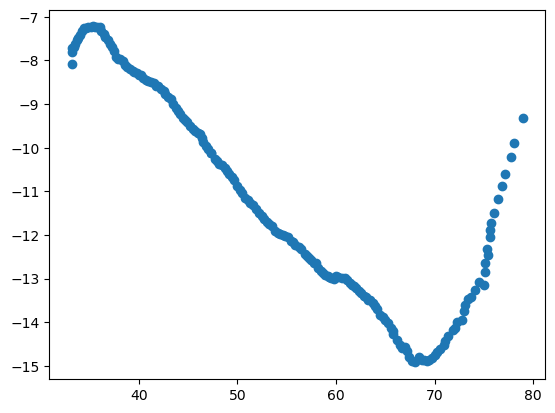

In [4]:
bev = traj_data["position"]
plt.scatter(bev[:, 0], bev[:, 1])
plt.show()

In [5]:
# for i in range(len(bev)):
#     img = Image.open(traj_root / f"{i}.jpg")
#     plt.imshow(img)
#     plt.show()

In [27]:
traj_dirs = sorted(Path("/mnt/vol0/datasets/vint_datasets/egowalk/").glob("*/"))
all_distances = np.array([])

for traj_dir in tqdm(traj_dirs):
    traj_data = pickle.load(open(traj_dir / "traj_data.pkl", "rb"))
    positions = traj_data["position"]
    distances = np.linalg.norm(np.diff(positions, axis=0), axis=1)
    all_distances = np.concatenate([all_distances, distances], axis=0)


100%|██████████| 3663/3663 [00:05<00:00, 634.08it/s]


In [29]:
np.mean(all_distances)

0.23165940624650413